In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

############ loading train and test datasets ##############
df  = pd.read_csv('sample_submission.csv')
train_data = pd.read_csv('train.csv')
test_data = pd.read_csv('test.csv')

In [2]:
train_data.isna().sum()[train_data.isna().sum()>0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
dtype: int64

In [3]:
############# total 19 NAN columns

In [4]:
############### Numerical Features ################################
numerical_features = [ f for f in train_data.columns if train_data[f].isnull().sum() > 1 and train_data[f].dtypes != 'O']

In [5]:
numerical_features

['LotFrontage', 'MasVnrArea', 'GarageYrBlt']

In [6]:
for i in numerical_features:
    median_val = train_data[i].median()
    train_data[i].fillna(median_val,inplace = True)

In [7]:
train_data.isna().sum()[train_data.isna().sum()>0].sort_values(ascending=False)

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
GarageType        81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtExposure      38
BsmtFinType2      38
BsmtQual          37
BsmtCond          37
BsmtFinType1      37
MasVnrType         8
Electrical         1
dtype: int64

In [8]:
############### categorical Features ################################
categorical_features = [ f for f in train_data.columns if train_data[f].isnull().sum() >= 1 and train_data[f].dtypes == 'O']

In [9]:
categorical_features

['Alley',
 'MasVnrType',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Electrical',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PoolQC',
 'Fence',
 'MiscFeature']

In [10]:
for i in categorical_features:
    train_data[i] = train_data[i].fillna('missing')

In [11]:
train_data[categorical_features].head()

,Alley,MasVnrType,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Electrical,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PoolQC,Fence,MiscFeature
0,missing,BrkFace,Gd,TA,No,GLQ,Unf,SBrkr,missing,Attchd,RFn,TA,TA,missing,missing,missing
1,missing,None,Gd,TA,Gd,ALQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA,missing,missing,missing
2,missing,BrkFace,Gd,TA,Mn,GLQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA,missing,missing,missing
3,missing,None,TA,Gd,No,ALQ,Unf,SBrkr,Gd,Detchd,Unf,TA,TA,missing,missing,missing
4,missing,BrkFace,Gd,TA,Av,GLQ,Unf,SBrkr,TA,Attchd,RFn,TA,TA,missing,missing,missing


In [12]:
train_data.isnull().sum().any()

False

In [13]:
# Temporal Variables/ Datetime Variables
Yr_features = [features for features in train_data.columns if 'Yr' in features or 'Year' in features]
print('number of Temporal Variables:', len(Yr_features))
train_data[Yr_features].head()

number of Temporal Variables: 4


,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,2003,2003,2003.0,2008
1,1976,1976,1976.0,2007
2,2001,2002,2001.0,2008
3,1915,1970,1998.0,2006
4,2000,2000,2000.0,2008


In [14]:
for i in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
    train_data[i] = train_data['YrSold'] - train_data[i]

In [15]:
train_data[Yr_features].head()

,YearBuilt,YearRemodAdd,GarageYrBlt,YrSold
0,5,5,5.0,2008
1,31,31,31.0,2007
2,7,6,7.0,2008
3,91,36,8.0,2006
4,8,8,8.0,2008


In [16]:
import numpy as np
num_features=['LotFrontage', 'LotArea', '1stFlrSF', 'GrLivArea', 'SalePrice']

for feature in num_features:
    train_data[feature]=np.log(train_data[feature])

c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

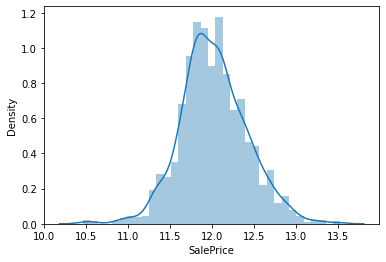

In [17]:
sns.distplot(train_data['SalePrice'])

In [18]:
train_data.shape

(1460, 81)

In [19]:
len(categorical_features)

16

In [20]:
train_data.head(25)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,4.174387,9.041922,Pave,missing,Reg,Lvl,AllPub,...,0,missing,missing,missing,0,2,2008,WD,Normal,12.247694
1,2,20,RL,4.382027,9.169518,Pave,missing,Reg,Lvl,AllPub,...,0,missing,missing,missing,0,5,2007,WD,Normal,12.109011
2,3,60,RL,4.219508,9.328123,Pave,missing,IR1,Lvl,AllPub,...,0,missing,missing,missing,0,9,2008,WD,Normal,12.317167
3,4,70,RL,4.094345,9.164296,Pave,missing,IR1,Lvl,AllPub,...,0,missing,missing,missing,0,2,2006,WD,Abnorml,11.849398
4,5,60,RL,4.430817,9.565214,Pave,missing,IR1,Lvl,AllPub,...,0,missing,missing,missing,0,12,2008,WD,Normal,12.429216
5,6,50,RL,4.442651,9.554993,Pave,missing,IR1,Lvl,AllPub,...,0,missing,MnPrv,Shed,700,10,2009,WD,Normal,11.870600
6,7,20,RL,4.317488,9.218705,Pave,missing,Reg,Lvl,AllPub,...,0,missing,missing,missing,0,8,2007,WD,Normal,12.634603
7,8,60,RL,4.234107,9.247829,Pave,missing,IR1,Lvl,AllPub,...,0,missing,missing,Shed,350,11,2009,WD,Normal,12.206073
8,9,50,RM,3.931826,8.719317,Pave,missing,Reg,Lvl,AllPub,...,0,missing,missing,missing,0,4,2008,WD,Abnorml,11.774520
9,10,190,RL,3.912023,8.911934,Pave,missing,Reg,Lvl,AllPub,...,0,missing,missing,missing,0,1,2008,WD,Normal,11.678440


In [21]:
categorical_features1 = [ f for f in train_data.columns if train_data[f].dtypes == 'O']
for feature in categorical_features1:
    labels_ordered=train_data.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    train_data[feature]=train_data[feature].map(labels_ordered)

In [22]:
train_data.head(25)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,4.174387,9.041922,1,2,0,1,1,...,0,0,4,2,0,2,2008,4,4,12.247694
1,2,20,3,4.382027,9.169518,1,2,0,1,1,...,0,0,4,2,0,5,2007,4,4,12.109011
2,3,60,3,4.219508,9.328123,1,2,1,1,1,...,0,0,4,2,0,9,2008,4,4,12.317167
3,4,70,3,4.094345,9.164296,1,2,1,1,1,...,0,0,4,2,0,2,2006,4,1,11.849398
4,5,60,3,4.430817,9.565214,1,2,1,1,1,...,0,0,4,2,0,12,2008,4,4,12.429216
5,6,50,3,4.442651,9.554993,1,2,1,1,1,...,0,0,2,1,700,10,2009,4,4,11.870600
6,7,20,3,4.317488,9.218705,1,2,0,1,1,...,0,0,4,2,0,8,2007,4,4,12.634603
7,8,60,3,4.234107,9.247829,1,2,1,1,1,...,0,0,4,1,350,11,2009,4,4,12.206073
8,9,50,1,3.931826,8.719317,1,2,0,1,1,...,0,0,4,2,0,4,2008,4,1,11.774520
9,10,190,3,3.912023,8.911934,1,2,0,1,1,...,0,0,4,2,0,1,2008,4,4,11.678440


In [23]:
scaling_feature=[feature for feature in train_data.columns if feature not in ['Id','SalePrice'] ]
len(scaling_feature)

79

In [24]:
########## checking for coreelation #############
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

correlation(train_data,0.75)

{'1stFlrSF',
 'Exterior2nd',
 'FireplaceQu',
 'GarageArea',
 'GarageCond',
 'GarageYrBlt',
 'PoolQC',
 'SalePrice',
 'TotRmsAbvGrd'}

In [25]:
train_data = train_data.drop(['1stFlrSF',
 'Exterior2nd',
 'FireplaceQu',
 'GarageArea',
 'GarageCond',
 'GarageYrBlt',
 'PoolQC',
'TotRmsAbvGrd'],axis=1)

In [26]:
scaling_feature=[feature for feature in train_data.columns if feature not in ['Id','SalePrice'] ]
len(scaling_feature)

71

In [27]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(train_data[scaling_feature])

MinMaxScaler()

In [28]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,4.174387,9.041922,1,2,0,1,1,...,0,0,4,2,0,2,2008,4,4,12.247694
1,2,20,3,4.382027,9.169518,1,2,0,1,1,...,0,0,4,2,0,5,2007,4,4,12.109011
2,3,60,3,4.219508,9.328123,1,2,1,1,1,...,0,0,4,2,0,9,2008,4,4,12.317167
3,4,70,3,4.094345,9.164296,1,2,1,1,1,...,0,0,4,2,0,2,2006,4,1,11.849398
4,5,60,3,4.430817,9.565214,1,2,1,1,1,...,0,0,4,2,0,12,2008,4,4,12.429216


In [29]:
scaler.transform(train_data[scaling_feature])

array([[0.23529412, 0.75      , 0.41820812, ..., 0.5       , 0.5       ,
        0.8       ],
       [0.        , 0.75      , 0.49506375, ..., 0.25      , 0.5       ,
        0.8       ],
       [0.23529412, 0.75      , 0.434909  , ..., 0.5       , 0.5       ,
        0.8       ],
       ...,
       [0.29411765, 0.75      , 0.42385922, ..., 1.        , 0.5       ,
        0.8       ],
       [0.        , 0.75      , 0.434909  , ..., 1.        , 0.5       ,
        0.8       ],
       [0.        , 0.75      , 0.47117546, ..., 0.5       , 0.5       ,
        0.8       ]])

In [30]:
train_data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,3,4.174387,9.041922,1,2,0,1,1,...,0,0,4,2,0,2,2008,4,4,12.247694
1,2,20,3,4.382027,9.169518,1,2,0,1,1,...,0,0,4,2,0,5,2007,4,4,12.109011
2,3,60,3,4.219508,9.328123,1,2,1,1,1,...,0,0,4,2,0,9,2008,4,4,12.317167
3,4,70,3,4.094345,9.164296,1,2,1,1,1,...,0,0,4,2,0,2,2006,4,1,11.849398
4,5,60,3,4.430817,9.565214,1,2,1,1,1,...,0,0,4,2,0,12,2008,4,4,12.429216


In [33]:
# transform the train and test set, and add on the Id and SalePrice variables
data = pd.concat([train_data[['Id', 'SalePrice']].reset_index(drop=True),
                    pd.DataFrame(scaler.transform(train_data[scaling_feature]), columns=scaling_feature)],
                    axis=1)

In [34]:
data.head()

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,...,3SsnPorch,ScreenPorch,PoolArea,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,1,12.247694,0.235294,0.75,0.418208,0.366344,1.0,1.0,0.000000,0.333333,...,0.0,0.0,0.0,1.0,0.5,0.0,0.090909,0.50,0.5,0.8
1,2,12.109011,0.000000,0.75,0.495064,0.391317,1.0,1.0,0.000000,0.333333,...,0.0,0.0,0.0,1.0,0.5,0.0,0.363636,0.25,0.5,0.8
2,3,12.317167,0.235294,0.75,0.434909,0.422359,1.0,1.0,0.333333,0.333333,...,0.0,0.0,0.0,1.0,0.5,0.0,0.727273,0.50,0.5,0.8
3,4,11.849398,0.294118,0.75,0.388581,0.390295,1.0,1.0,0.333333,0.333333,...,0.0,0.0,0.0,1.0,0.5,0.0,0.090909,0.00,0.5,0.2
4,5,12.429216,0.235294,0.75,0.513123,0.468761,1.0,1.0,0.333333,0.333333,...,0.0,0.0,0.0,1.0,0.5,0.0,1.000000,0.50,0.5,0.8


In [35]:
data.to_csv('final_train.csv',index=False)

In [36]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()

X = data.drop(['Id','SalePrice'],axis =1)
y = data['SalePrice']

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


lm.fit(X_train,y_train)
pred = lm.predict(X_test)
print("test data Score:",lm.score(X_test,y_test))
print("train data Score:" , lm.score(X_train,y_train))
from sklearn.metrics import r2_score
re = r2_score(y_test, pred)
print("r2 sqyuare value",re)

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, pred))
print('MSE:', metrics.mean_squared_error(y_test, pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, pred)))

test data Score: 0.9063008636356651
train data Score: 0.9057165248227947
r2 sqyuare value 0.9063008636356651
MAE: 0.08933866687457576
MSE: 0.015895699147441045
RMSE: 0.1260781469860699


In [37]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(random_state = 42)
rf.fit(X_train,y_train)
rf_y_pred = rf.predict(X_test)

print("test data Score:", rf.score(X_test,y_test))
print("train data Score:" , rf.score(X_train,y_train))
from sklearn.metrics import r2_score
re = r2_score(y_test, rf_y_pred)
print("r2 sqyuare value",re)

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, rf_y_pred))
print('MSE:', metrics.mean_squared_error(y_test, rf_y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_y_pred)))

test data Score: 0.8981503656462504
train data Score: 0.9810454432296928
r2 sqyuare value 0.8981503656462504
MAE: 0.08768271616617757
MSE: 0.017278399874134962
RMSE: 0.13144732737539763


In [38]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [10,50,100,200,500,800]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [10,20,30,50,80]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]




# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}

rf = RandomForestRegressor()
rf_random = RandomizedSearchCV(estimator = rf, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


RandomizedSearchCV(cv=3, estimator=RandomForestRegressor(), n_iter=100,
                   n_jobs=-1,
                   param_distributions={'bootstrap': [True, False],
                                        'max_depth': [10, 20, 30, 50, 80, None],
                                        'max_features': ['auto', 'sqrt'],
                                        'min_samples_leaf': [1, 2, 4],
                                        'min_samples_split': [2, 5, 10],
                                        'n_estimators': [10, 50, 100, 200, 500,
                                                         800]},
                   random_state=42, verbose=2)

In [39]:
rf_random.best_params_

{'n_estimators': 800,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': False}

In [40]:
rf_best = RandomForestRegressor(n_estimators =  800,
 min_samples_split =  2,
 min_samples_leaf =  1,
 max_features = 'sqrt',
 max_depth = 50,
 bootstrap = False)

In [41]:
rf_best.fit(X_train,y_train)
rf_y_pred_best = rf_best.predict(X_test)

print("test data Score:", rf_best.score(X_test,y_test))
print("train data Score:" , rf_best.score(X_train,y_train))
from sklearn.metrics import r2_score
re = r2_score(y_test, rf_y_pred_best)
print("r2 sqyuare value",re)

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, rf_y_pred_best))
print('MSE:', metrics.mean_squared_error(y_test, rf_y_pred_best))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, rf_y_pred_best)))

test data Score: 0.8945132158031242
train data Score: 1.0
r2 sqyuare value 0.8945132158031242
MAE: 0.08691919437396249
MSE: 0.01789542839652914
RMSE: 0.13377379562727948


c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

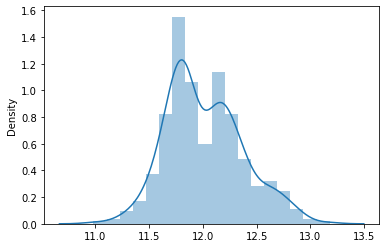

In [43]:
sns.distplot(rf_y_pred_best)

c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

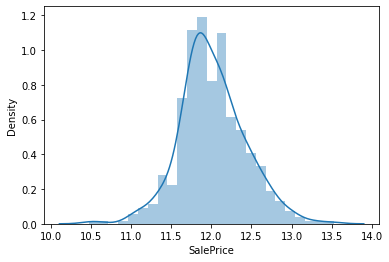

In [44]:
sns.distplot(y_test)

In [45]:
############### gradient boosting ########################

# Import models and utility functions
from sklearn.ensemble import GradientBoostingRegressor
gbr = GradientBoostingRegressor()
gbr.fit(X_train,y_train)
gbr_y_pred = gbr.predict(X_test)

print("test data Score:", gbr.score(X_test,y_test))
print("train data Score:" , gbr.score(X_train,y_train))

from sklearn.metrics import r2_score
re = r2_score(y_test, gbr_y_pred)
print("r2 sqyuare value",re)

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, gbr_y_pred))
print('MSE:', metrics.mean_squared_error(y_test, gbr_y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, gbr_y_pred)))

test data Score: 0.9087820406977503
train data Score: 0.9635887176407285
r2 sqyuare value 0.9087820406977503
MAE: 0.08319802616544661
MSE: 0.015474776974187678
RMSE: 0.12439765662659276


In [46]:
from sklearn.model_selection import RandomizedSearchCV
loss = ['ls', 'lad', 'huber']
n_estimators = [100, 500, 900, 1100, 1500]
max_depth = [2, 3, 5, 10, 15]
min_samples_leaf = [1, 2, 4, 6, 8] 
min_samples_split = [2, 4, 6, 10]
max_features = ['auto', 'sqrt', 'log2', None]
learning_rate = [1, 0.5, 0.25, 0.1, 0.05, 0.01]

# Define the grid of hyperparameters to search
hyperparameter_grid = {'loss': loss,
    'n_estimators': n_estimators,
    'max_depth': max_depth,
    'min_samples_leaf': min_samples_leaf,
    'min_samples_split': min_samples_split,
    'max_features': max_features,
     'learning_rate':learning_rate}

gbr = GradientBoostingRegressor()
# Set up the random search with 4-fold cross validation
random_cv = RandomizedSearchCV(estimator=gbr,
            param_distributions=hyperparameter_grid,
            cv=4, n_iter=50,
            n_jobs = -1,
            verbose = 5, 
            random_state=42)
random_cv.fit(X_train,y_train)

Fitting 4 folds for each of 50 candidates, totalling 200 fits


RandomizedSearchCV(cv=4, estimator=GradientBoostingRegressor(), n_iter=50,
                   n_jobs=-1,
                   param_distributions={'learning_rate': [1, 0.5, 0.25, 0.1,
                                                          0.05, 0.01],
                                        'loss': ['ls', 'lad', 'huber'],
                                        'max_depth': [2, 3, 5, 10, 15],
                                        'max_features': ['auto', 'sqrt', 'log2',
                                                         None],
                                        'min_samples_leaf': [1, 2, 4, 6, 8],
                                        'min_samples_split': [2, 4, 6, 10],
                                        'n_estimators': [100, 500, 900, 1100,
                                                         1500]},
                   random_state=42, verbose=5)

In [47]:
random_cv.best_params_

{'n_estimators': 1100,
 'min_samples_split': 6,
 'min_samples_leaf': 8,
 'max_features': 'log2',
 'max_depth': 3,
 'loss': 'huber',
 'learning_rate': 0.05}

In [48]:
gbr_best = GradientBoostingRegressor(n_estimators = 1100,
 min_samples_split =  6,
 min_samples_leaf =  8,
 max_features= 'log2',
 max_depth= 3,
 loss= 'huber',
 learning_rate= 0.05)

In [49]:
gbr_best.fit(X_train,y_train)
gbr_y_pred_best = gbr_best.predict(X_test)

print("test data Score:", gbr_best.score(X_test,y_test))
print("train data Score:" , gbr_best.score(X_train,y_train))

from sklearn.metrics import r2_score
re = r2_score(y_test, gbr_y_pred_best)
print("r2 sqyuare value",re)

from sklearn import metrics
print('MAE:', metrics.mean_absolute_error(y_test, gbr_y_pred_best))
print('MSE:', metrics.mean_squared_error(y_test, gbr_y_pred_best))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, gbr_y_pred_best)))

test data Score: 0.9132594795129566
train data Score: 0.9719689966264426
r2 sqyuare value 0.9132594795129566
MAE: 0.07910980928869105
MSE: 0.014715196650193526
RMSE: 0.1213062102705114


c:\users\manojkumar m mhetre\appdata\local\programs\python\python39\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SalePrice', ylabel='Density'>

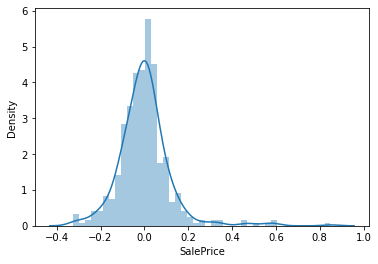

In [51]:
sns.distplot(gbr_y_pred_best-y_test)